In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer # 用来填补缺失值
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
# # 显示多行的执行信息
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [12]:
dataset = load_boston()
dataset.data.shape

(506, 13)

In [14]:
# 总共506*13 = 6578个数据集
x_full,y_full = dataset.data,dataset.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]

n_samples
n_features

506

13

In [18]:
# 确定我们希望放入的确实的数据比列，比如说这里是50%，那就是又3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
# np.floor()表示乡下取整
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
n_missing_samples

3289

> #### 将所有的数据随机遍布在各行各列之中，而一个缺失值会需要一个行索引和一个列索引，如果能够创造一个**数组**，在包含3289个分布在0—506和0~13列之间额的列索引，那么我们就可以利用索引的填充为0，接下来就可以用0，均值和随机森林来填写这些缺失值，然后查看这些鬼鬼的结果如何

In [20]:
missing_features = rng.randint(0,n_features,n_missing_samples)
# randint(上线，下线，n) 在上线和下限之安静取出n个整数
missing_samples = rng.randint(0,n_samples,n_missing_samples)

# 利用这两个进行组合坐标，以此来创造缺失的值
x_missing = x_full.copy()
y_missing = y_full.copy()
x_missing[missing_samples,missing_features ] = np.nan

In [22]:
x_missing = pd.DataFrame(x_missing)
x_missing
# numpy 对矩阵的运算特别的快，但是在索引的功能上是不如pandas的

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
5,NaN,0.0,NaN,0.0,NaN,6.430,58.7,6.0622,NaN,222.0,18.7,NaN,5.21
6,NaN,12.5,NaN,0.0,0.524,NaN,66.6,5.5605,NaN,NaN,15.2,NaN,12.43
7,NaN,12.5,NaN,NaN,0.524,NaN,96.1,5.9505,NaN,311.0,15.2,396.90,19.15
8,NaN,NaN,7.87,NaN,0.524,5.631,NaN,6.0821,5.0,311.0,NaN,NaN,29.93
9,0.17004,NaN,7.87,0.0,0.524,NaN,NaN,6.5921,NaN,311.0,NaN,386.71,NaN


In [27]:
# 使用均值进行填充
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan,strategy = 'mean') # 实例化
x_missing_mean  = imp_mean.fit_transform(x_missing) # fit+ predict >>== fit_transform
x_missing_mean
pd.DataFrame(x_missing_mean).isnull().sum()

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [28]:
# 使用0进行填补 使用的策略是常数（constant），整常数就是0 >>> fill_value
imp_0 = SimpleImputer(missing_values = np.nan,strategy = 'constant',fill_value = 0)
x_missing_0 = imp_0.fit_transform(x_missing)
pd.DataFrame(x_missing_0)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.00,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.00,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.00,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.00,5.33
5,0.00000,0.0,0.00,0.0,0.000,6.430,58.7,6.0622,0.0,222.0,18.7,0.00,5.21
6,0.00000,12.5,0.00,0.0,0.524,0.000,66.6,5.5605,0.0,0.0,15.2,0.00,12.43
7,0.00000,12.5,0.00,0.0,0.524,0.000,96.1,5.9505,0.0,311.0,15.2,396.90,19.15
8,0.00000,0.0,7.87,0.0,0.524,5.631,0.0,6.0821,5.0,311.0,0.0,0.00,29.93
9,0.17004,0.0,7.87,0.0,0.524,0.000,0.0,6.5921,0.0,311.0,0.0,386.71,0.00


In [35]:
# 利用随机森林来填补缺失值
x_missing_reg = x_missing.copy()
sortindex = np.argsort(x_missing_reg.isnull().sum(axis = 0)).values
sortindex
for i  in sortindex:
    # 构建我们新的特征矩阵和新的标签
    df = x_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis = 1)
    
    # 在新特征矩阵中对含有缺失值的列，进行0的填补
    df_0 = SimpleImputer(missing_values = np.nan,
                        strategy = 'constant',
                        fill_value = 0).fit_transform(df)
    
    # 找出训练集和测试集
    ytrain = fillc[fillc.notnull()]
    ytest = fillc[fillc.isnull()]
    xtrain = df_0[ytrain.index,:]
    xtest = df_0[ytest.index,:]
    
    # 用随机森林来填补缺失值
    rfc = RandomForestRegressor(n_estimators =100)
    rfc = rfc.fit(xtrain,ytrain)
    ypredict = rfc.predict(xtest)
    
    # 将填补好的特征返回到我们原始的特征矩阵中
    x_missing_reg.loc[x_missing.iloc[:,i].isnull(),i] =ypredict
    
x_missing_reg
    
        

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.223534,18.000,5.9785,0.16,0.538000,6.70644,65.200,4.090000,1.00,296.00,18.106,388.7819,4.9800
1,0.027310,0.000,6.2901,0.00,0.469000,6.16546,78.900,4.967100,2.00,305.93,18.158,396.9000,9.1400
2,0.027290,16.490,7.0700,0.00,0.457506,7.18500,61.100,4.140410,2.00,242.00,17.646,390.7410,4.9512
3,0.099503,18.600,3.1949,0.00,0.458000,6.86557,45.800,4.684276,3.74,222.00,18.700,393.0951,5.8099
4,0.059234,0.000,2.1800,0.00,0.455403,7.14700,58.927,5.070395,3.74,237.37,18.700,393.3405,5.3300
5,0.050164,0.000,4.8955,0.00,0.458399,6.43000,58.700,6.062200,3.21,222.00,18.700,392.4699,5.2100
6,0.239980,12.500,7.9029,0.00,0.524000,6.10767,66.600,5.560500,3.96,300.54,15.200,391.6700,12.4300
7,0.443965,12.500,10.3496,0.47,0.524000,6.49392,96.100,5.950500,5.19,311.00,15.200,396.9000,19.1500
8,0.376401,11.310,7.8700,0.00,0.524000,5.63100,78.580,6.082100,5.00,311.00,17.711,367.0769,29.9300
9,0.170040,19.045,7.8700,0.00,0.524000,5.85611,66.660,6.592100,5.31,311.00,17.123,386.7100,13.5017


In [39]:
    # 将填补好的数据进行建模
    # 对所有的数据进行建模，取得MSE的结果
    X = [x_full,x_missing_mean,x_missing_0,x_missing_reg]
    mse = []
    std = []
    
    for x in X:
        estimator = RandomForestRegressor(random_state = 0,n_estimators = 100)
        scores = cross_val_score(estimator,x,y_full,scoring = 'neg_mean_squared_error',cv = 5).mean()
        mse.append(scores * -1)
    
    [*zip(mse,["x_full","x_missing_mean","x_missing_0","x_missing_reg"])]

[(21.62860460743544, 'x_full'),
 (40.84405476955929, 'x_missing_mean'),
 (49.50657028893417, 'x_missing_0'),
 (21.289251623568227, 'x_missing_reg')]

<Figure size 864x432 with 0 Axes>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'Imputation Techniques with Boston Data')

(19.160326461211405, 54.457227317827595)

Text(0.5, 0, 'MSE')

[Text(0, 0, 'full_data'),
 Text(0, 0, 'Zero Imputation'),
 Text(0, 0, 'Mean Imputation'),
 Text(0, 0, 'Regressor Imputation')]

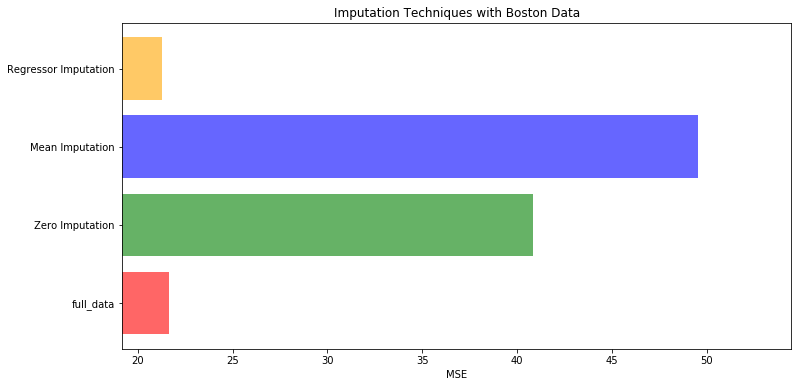

In [47]:
# 画出条形图
x_labels = ["full_data","Zero Imputation","Mean Imputation","Regressor Imputation"]
colors = ['r','g','b','orange']

plt.figure(figsize = (12,6))
ax = plt.subplot(111)

for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color = colors[i],alpha = 0.6,align ='center')

ax.set_title("Imputation Techniques with Boston Data")
ax.set_xlim(left = np.min(mse) *0.9,
            right = np.max(mse) * 1.1
           )

ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()